# HDS 5210 Final Project: Type 2 Diabetes prevalence in different population, symptoms and related COVID 19 deaths in Multiple Data Sets.
### Nathi Ranjith

This project examines data about Diabetes and related COVID 19 deaths in the United States using 3 data sources(Internet, Kaggle database, local files) and 2 types of files (CSV and Excel): those are includes HealthData.gov(CDC), UCI data set(Center for Clinical and Translational Research, Virginia Commonwealth University) and diabetes data set from Kaggle website. While UCI  data set contains Diabetes data from 130-US hospitals for 10 years, kaggle data set is about symptoms of diabete and CDC data was most recently conducted between 2020-2022 and last data set contain info regarding COVID 19 mortality due to Diabetes complications. Thus, the present project focuses various diabetes symptoms and its prevalence in various population and gender variance, hospital stay information and its treatment strategies and Covid 19 deaths due to diabetes risk. 

All data/documentation can be found at the following links: 

 * HealthData.gov :
 
 Documentation: https://healthdata.gov/dataset/Conditions-Contributing-to-COVID-19-Deaths-by-Stat/uvkj-kpue
 
 Data:  https://data.cdc.gov/api/views/hk9y-quqm/rows.csv?accessType=DOWNLOAD
 
 File name: `covid19_deaths_dm.xlsx`
 
* UCI Data set: 
 
 Documentation: https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008
 
 Data: https://archive.ics.uci.edu/ml/machine-learning-databases/00296/dataset_diabetes.zip
 
 File name: `diabetic_data.csv`
 
* Kaggle web site data: 
 
 Documentation: https://www.kaggle.com/datasets/alakaaay/diabetes-uci-dataset
 
 Data: https://www.kaggle.com/datasets/alakaaay/diabetes-uci-dataset
 
 File name: `diabetes_symptoms.csv`



All Files were saved to the `/final` directory for easy access.  

## Approach for data management:
There are 3 sources of data documented below

## This notebook is divided into 3 parts 
### PART A - UCI  data set:

The dataset represents 10 years of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.

(1) It is an inpatient encounter (a hospital admission).

(2) It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.

(3) The length of stay was at least 1 day and at most 14 days.

(4) Laboratory tests were performed during the encounter.

(5) Medications were administered during the encounter.

The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.

24 features for medications For the generic names: metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, and metformin-pioglitazone, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed.

from the above data we are going to analyse prevalence of diabetes in different types of population and gender, hospital stay with medicatio information. 

### PART B -  Kaggle website data related to diabetes symptoms

This dataset has been collected using direct questionnaires from the patients of Sylhet Diabetes
Hospital in Sylhet and approved by a doctor.

Content
Attribute information:

1) Age: 20-65
2) Sex: Male/Female
3) Polyuria: Yes/No
4) Polydipsia: Yes/No
5) sudden weight loss: Yes/No
6) weakness: Yes/No
7) Polyphagia: Yes/No
8) Genital thrush: Yes/No
9) visual blurring: Yes/No
10) Itching: Yes/No
11) Irritability: Yes/No
12) delayed healing: Yes/No
13) partial paresis: Yes/No
14) muscle stiffness: Yes/No
15) Alopecia: Yes/No
16) Obesity: Yes/No
17) Class: Positive/Negative

from the above data we are going to focus on what type of symptoms are more prevalent in Diabetic patients and which age is group is mostly affected. This data is very useful for prevention management based on the symptomatic precautions.


### PART C - 

This dataset shows health conditions and contributing causes mentioned in conjunction with deaths involving coronavirus disease 2019 (COVID-19) by age group and jurisdiction of occurrence.

From all above data we are mainly focusing on data related DM risk associated COVID 19 Deaths. this 3 studies are conducted in different location across US and one study from Bangladesh, there is no specific correlation in between these 3 studies but we are going to examine most occuring symptoms for DM and DM prevalence in Various population, Gender variance and its risk associated with COVID 19 individually. 

## Data Analysis Part A 

In [1]:
## Data Analysis Part A 
## importing all libraries which are helpful to me
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading different files with the commands
diabetes = pd.read_csv('diabetic_data.csv')
covid_dm = pd.read_excel('covid19_deaths_dm.xlsx')
diabetes_symp = pd.read_csv('diabetes_symptoms.csv')
diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
diabetes.shape

(101766, 50)

In [4]:
#now i'm going to Check Missing Values present in this data
def check_missing(dataframe):
    
    return [[dataframe[c].isna().sum(), c] for c in dataframe.columns]

check_missing(diabetes)

[[0, 'encounter_id'],
 [0, 'patient_nbr'],
 [0, 'race'],
 [0, 'gender'],
 [0, 'age'],
 [0, 'weight'],
 [0, 'admission_type_id'],
 [0, 'discharge_disposition_id'],
 [0, 'admission_source_id'],
 [0, 'time_in_hospital'],
 [0, 'payer_code'],
 [0, 'medical_specialty'],
 [0, 'num_lab_procedures'],
 [0, 'num_procedures'],
 [0, 'num_medications'],
 [0, 'number_outpatient'],
 [0, 'number_emergency'],
 [0, 'number_inpatient'],
 [0, 'diag_1'],
 [0, 'diag_2'],
 [0, 'diag_3'],
 [0, 'number_diagnoses'],
 [0, 'max_glu_serum'],
 [0, 'A1Cresult'],
 [0, 'metformin'],
 [0, 'repaglinide'],
 [0, 'nateglinide'],
 [0, 'chlorpropamide'],
 [0, 'glimepiride'],
 [0, 'acetohexamide'],
 [0, 'glipizide'],
 [0, 'glyburide'],
 [0, 'tolbutamide'],
 [0, 'pioglitazone'],
 [0, 'rosiglitazone'],
 [0, 'acarbose'],
 [0, 'miglitol'],
 [0, 'troglitazone'],
 [0, 'tolazamide'],
 [0, 'examide'],
 [0, 'citoglipton'],
 [0, 'insulin'],
 [0, 'glyburide-metformin'],
 [0, 'glipizide-metformin'],
 [0, 'glimepiride-pioglitazone'],
 [0, 

In [5]:
# writing fuction for creating numeric columns for easy understanding.
def create_numeric_feature(input_diabetes):
    use_columns = diabetes_columns 
    return input_diabetes_[use_columns].copy()

In [6]:
##replacing all ? with NaN
diabetes = diabetes.replace("?", np.NaN, )

In [7]:
#Replacing missing race with previous value – Forward fill

diabetes = diabetes.where(~diabetes.race.isnull(), diabetes.fillna(axis=0, method='ffill'))
diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [8]:
##now going to find out duplicate IDs in the column:

len(diabetes.encounter_id.unique()) == diabetes.shape[0]

True

In [9]:
##finding any duplicates in the patient_nbr column:

len(diabetes.patient_nbr.unique()) == diabetes.shape[0]

False

In [10]:
##analysing how much % of patients have more than 1 encouters:

df1 = diabetes.groupby('patient_nbr').size().sort_values(ascending=False)
df1 = pd.DataFrame(df1)
df1.columns = ['Encounters']
df1['patient_nbr'] = df1.index
df1.reset_index(inplace=True, drop=True)

round((df1.loc[df1.Encounters>1, ].shape[0] / df1.Encounters.sum()) * 100, 2)

16.48

## 16% of the patients had more than one encounters in this data

In [11]:
## merging 2 dataframe than creating a new dataframe with selected columns:

df2 = pd.merge(df1,
               diabetes[['race', 'gender', 'age', 'patient_nbr']],
               how="left",
               left_on="patient_nbr",
               right_on="patient_nbr")

df2 = df2.drop_duplicates(subset=['patient_nbr'],
                          keep='first',
                          inplace=False)


df2.shape

(71518, 5)

In [12]:
#how many types of race in this data?

diabetes["race"].value_counts()

Caucasian          77840
AfricanAmerican    19622
Hispanic            2094
Other               1542
Asian                668
Name: race, dtype: int64

## Caucasian population has more risk for getting diabetes followed by AfricanAmericans

In [13]:
#for easy understanding i used pie chart for different population by Race

Caucasian = diabetes.loc[diabetes["race"]=="Caucasian"].count()[0]
Afro_American = diabetes.loc[diabetes["race"]=="AfricanAmerican"].count()[0]
Hispanic = diabetes.loc[diabetes["race"]=="Hispanic"].count()[0]
Other = diabetes.loc[diabetes["race"]=="Other"].count()[0]
Asian = diabetes.loc[diabetes["race"]=="Asian"].count()[0]

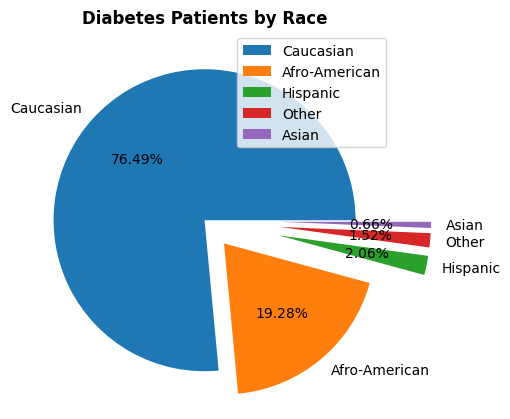

In [14]:
plt.figure(figsize = [5,5], dpi = 100)
labels = ["Caucasian", "Afro-American", "Hispanic", "Other", "Asian"]
explode = [0,0.2,0.5,0.5,0.5]

plt.pie([Caucasian, Afro_American, Hispanic, Other, Asian], labels = labels, autopct = "%0.2f%%", explode = explode)
plt.title("Diabetes Patients by Race", fontdict = {"fontweight": "bold"})

plt.legend()
plt.show()

## Caucasian are largest group of diabetic patients diagnosed, followed by Afro-American

In [15]:
#gender analysis based on the given data

df = diabetes.groupby(["gender"]).size().sort_values(ascending = False)
df

gender
Female             54708
Male               47055
Unknown/Invalid        3
dtype: int64

### Female population is more in this data compared to males

In [16]:
#creating pie chart based on male and female population data 

Male = diabetes.loc[diabetes["gender"]=="Male"].count()[0]
Female = diabetes.loc[diabetes["gender"]=="Female"].count()[0]
Other = diabetes.loc[diabetes["gender"]=="Other"].count()[0]

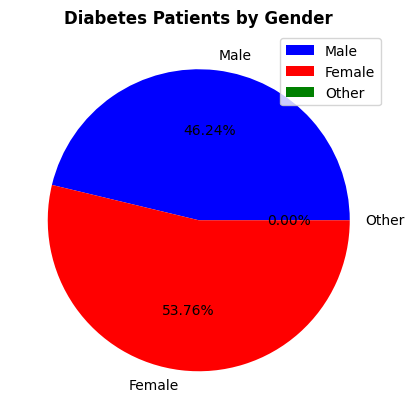

In [17]:
plt.figure(figsize = [5,5], dpi = 100)
labels = ["Male", "Female", "Other"]
colors = ["Blue", "Red", "Green"]

plt.pie([Male, Female, Other], colors = colors, labels = labels, autopct = "%0.2f%%")
plt.title("Diabetes Patients by Gender", fontdict = {"fontweight": "bold"})

plt.legend()
plt.show()

## Females are marginally more in number than Males. Others are negligible.

In [18]:
#Now we are going to group the data by age to know what type of age group is mostly afftected by Diabetes

df = diabetes.groupby(["age"]).size()

In [19]:
df1 = pd.DataFrame(df)
df1.columns = ["Count"]
df1

,Count
age,
[0-10),161
[10-20),691
[20-30),1657
[30-40),3775
[40-50),9685
[50-60),17256
[60-70),22483
[70-80),26068
[80-90),17197


In [20]:
#finding % of the each age group in this data

df1["pct"] = (df1["Count"]/(df1["Count"].sum()))*100
df1["pct"]

age
[0-10)       0.158206
[10-20)      0.679009
[20-30)      1.628245
[30-40)      3.709490
[40-50)      9.516931
[50-60)     16.956547
[60-70)     22.092840
[70-80)     25.615628
[80-90)     16.898571
[90-100)     2.744532
Name: pct, dtype: float64

In [21]:
#creating a new data with age count and % of population in that range:

df1

,Count,pct
age,,
[0-10),161,0.158206
[10-20),691,0.679009
[20-30),1657,1.628245
[30-40),3775,3.709490
[40-50),9685,9.516931
[50-60),17256,16.956547
[60-70),22483,22.092840
[70-80),26068,25.615628
[80-90),17197,16.898571


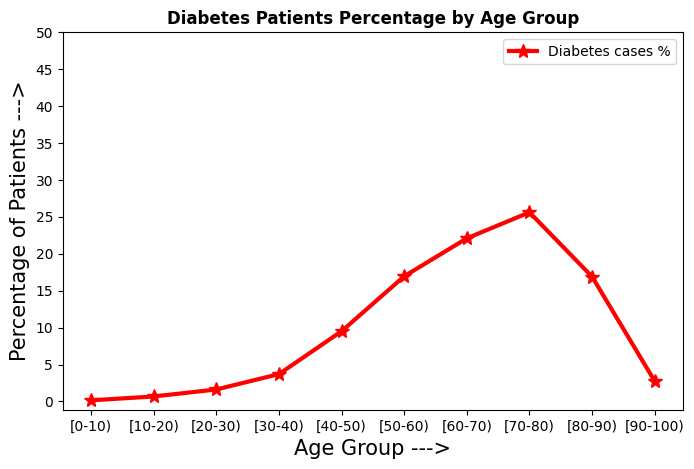

In [22]:
plt.figure(figsize = [8,5], dpi = 100)

plt.xlabel("Age Group --->", fontdict = { "fontsize": 15})  # to label the axis x and y
plt.ylabel("Percentage of Patients --->", fontdict = { "fontsize": 15})

plt.plot(df1["pct"], label = "Diabetes cases %", color = "red", linewidth = 3, marker = "*", markersize = 10)
plt.title("Diabetes Patients Percentage by Age Group", fontdict = {"fontweight": "bold"})

plt.yticks([0,5,10,15,20,25,30,35,40,45,50])

plt.legend()
plt.show()

### Patients in age group [70-80] forms largest percentage of patients i.e. around 25%. While [0-10] form smallest percentage.

In [23]:
# finding length of hospital stay by each patient in this data

t_in_h = pd.DataFrame(diabetes["time_in_hospital"].groupby(diabetes["age"]).mean())
t_in_h                      

,time_in_hospital
age,
[0-10),2.546584
[10-20),3.191027
[20-30),3.564876
[30-40),3.799735
[40-50),4.039649
[50-60),4.125753
[60-70),4.382244
[70-80),4.590878
[80-90),4.808629


In [24]:
l1 = list(t_in_h.index.values)
l2 = list(t_in_h["time_in_hospital"])

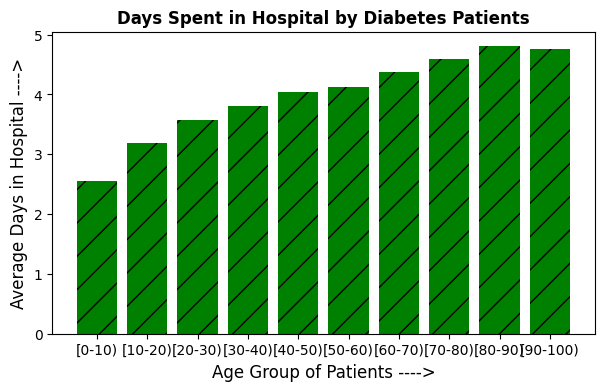

In [25]:
plt.figure(figsize = (7,4), dpi = 100)

bars = plt.bar(l1,l2, color = "green", hatch = "/")
plt.ylabel("Average Days in Hospital ---->", fontdict = { "fontsize": 12})
plt.xlabel("Age Group of Patients ---->", fontdict = {"fontsize": 12})

plt.title("Days Spent in Hospital by Diabetes Patients", fontdict = {"fontweight": "bold"})

plt.show()

### Patients in age group of [80-90) spend high number of day in hospital on an average.

In [26]:
# data transformation with the number of diagnosis and group by age 

num_diag = pd.DataFrame(diabetes["number_diagnoses"].groupby(diabetes["age"]).mean())
l1 = list(num_diag.index.values)
l2 = list(num_diag["number_diagnoses"])

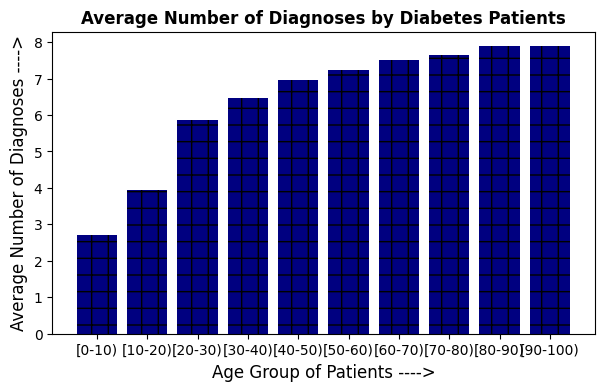

In [27]:
plt.figure(figsize = (7,4), dpi = 100)

bars = plt.bar(l1,l2, color = "navy", hatch = "+")
plt.ylabel("Average Number of Diagnoses ---->", fontdict = { "fontsize": 12})
plt.xlabel("Age Group of Patients ---->", fontdict = {"fontsize": 12})

plt.title("Average Number of Diagnoses by Diabetes Patients", fontdict = {"fontweight": "bold"})

plt.show()

### Average number of Diagnoses increase significantly during early age but becomes steady between 7-8 procedures after 60 year of age.

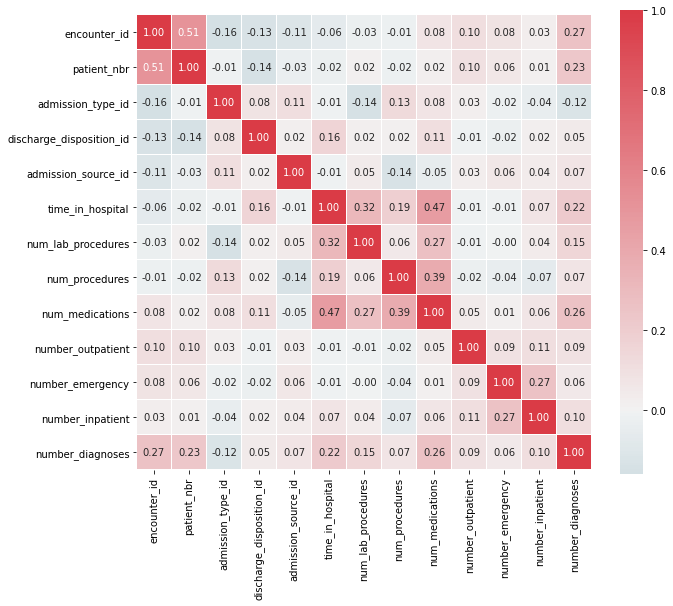

In [28]:
# creating function for to know how much % of correlation present in this data 

def HeatMap(df,x=True):
        correlations = diabetes.corr()
        ## Create color map ranging between two colors
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
        fig, ax = plt.subplots(figsize=(10, 10))
        fig = sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',square=True, linewidths=.5, annot=x, cbar_kws={"shrink": .75})
        fig.set_xticklabels(fig.get_xticklabels(), rotation = 90, fontsize = 10)
        fig.set_yticklabels(fig.get_yticklabels(), rotation = 0, fontsize = 10)
        plt.tight_layout()
        plt.show()

HeatMap(diabetes,x=True)

### There is no highly corrolated feature in this data set.

In [29]:
# separating data of by insulin levels which is administered in the hospital in patient department

df = diabetes.groupby(["insulin"]).size().sort_values(ascending = False)
Steady = diabetes.loc[diabetes["insulin"]=="Steady"].count()[0]
Down = diabetes.loc[diabetes["insulin"]=="Down"].count()[0]
Up = diabetes.loc[diabetes["insulin"]=="Up"].count()[0]

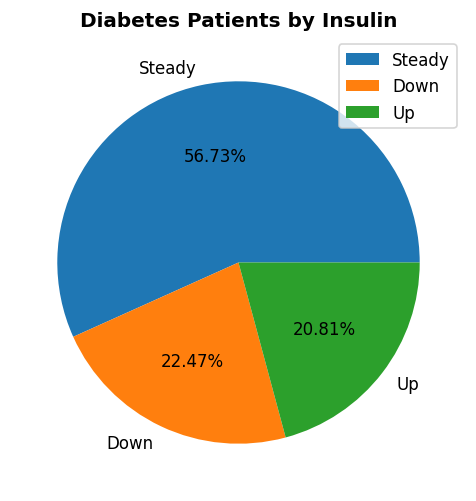

In [30]:
plt.figure(figsize = [5,5], dpi = 120)
labels = ["Steady", "Down", "Up"]

plt.pie([Steady, Down, Up], labels = labels, autopct = "%0.2f%%")
plt.title("Diabetes Patients by Insulin", fontdict = {"fontweight": "bold"})

plt.legend()
plt.show()

# Majority of patients have insulin level steady

In [31]:
#data of patient medication adherence

df = diabetes.groupby(["diabetesMed"]).size().sort_values(ascending = False)
Yes = diabetes.loc[diabetes["diabetesMed"]=="Yes"].count()[0]
No = diabetes.loc[diabetes["diabetesMed"]=="No"].count()[0]

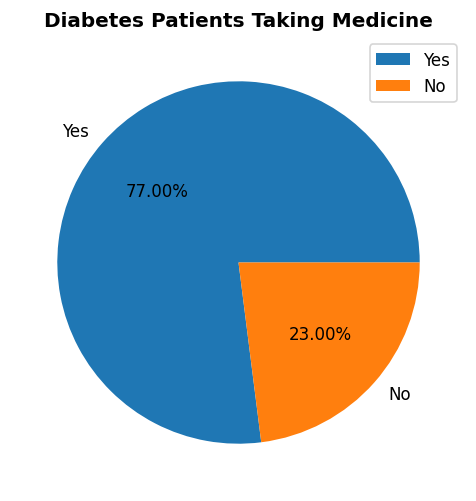

In [32]:
plt.figure(figsize = [5,5], dpi = 120)
labels = ["Yes", "No"]

plt.pie([Yes, No], labels = labels, autopct = "%0.2f%%")
plt.title("Diabetes Patients Taking Medicine", fontdict = {"fontweight": "bold"})

plt.legend()
plt.show()

# 77% of patients are taking their medicines while 23% are not taking medicine. Good Medication Compliance

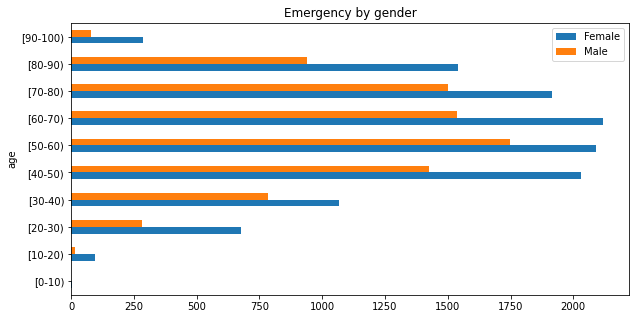

In [33]:
##Total emergency admisions by gender:

d1 = diabetes[diabetes.gender=='Female'].groupby('age').agg({'number_emergency' : ['sum']})
d1 = pd.DataFrame(d1)
d1.droplevel(0, axis=1)
d1.columns = ['Female']

d2 = diabetes[diabetes.gender=='Male'].groupby('age').agg({'number_emergency' : ['sum']})
d2 = pd.DataFrame(d2)
d2.droplevel(0, axis=1)
d2.columns = ['Male']
d1 = d1.join(d2)
d1.plot.barh(figsize=(10,5), legend=True, title="Emergency by gender");
del d1, d2

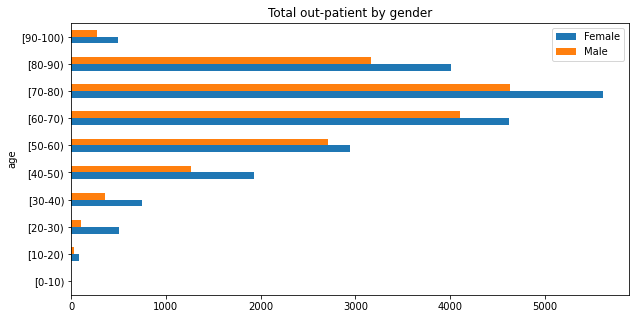

In [34]:
##Total outpatient by gender, merging two types of data for easy visualization:

d1 = diabetes[diabetes.gender=='Female'].groupby('age').agg({'number_outpatient' : ['sum']})
d1 = pd.DataFrame(d1)
d1.droplevel(0, axis=1)
d1.columns = ['Female']

d2 = diabetes[diabetes.gender=='Male'].groupby('age').agg({'number_outpatient' : ['sum']})
d2 = pd.DataFrame(d2)
d2.droplevel(0, axis=1)
d2.columns = ['Male']
d1 = d1.join(d2)
d1.plot.barh(figsize=(10,5), legend=True, title="Total out-patient by gender");
del d1, d2

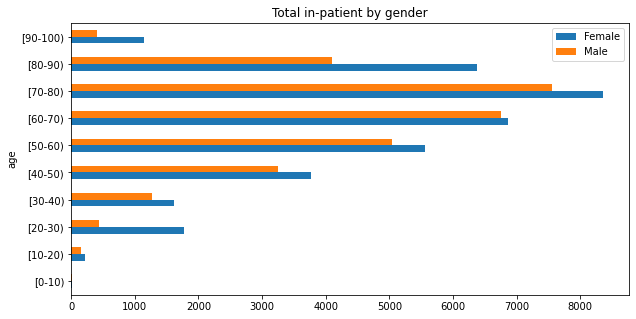

In [35]:
##Total inpatient by gender

d1 = diabetes[diabetes.gender=='Female'].groupby('age').agg({'number_inpatient' : ['sum']})
d1 = pd.DataFrame(d1)
d1.droplevel(0, axis=1)
d1.columns = ['Female']

d2 = diabetes[diabetes.gender=='Male'].groupby('age').agg({'number_inpatient' : ['sum']})
d2 = pd.DataFrame(d2)
d2.droplevel(0, axis=1)
d2.columns = ['Male']
d1 = d1.join(d2)
d1.plot.barh(figsize=(10,5), legend=True, title="Total in-patient by gender");
del d1, d2

## KEY Findings of Part A

* Distribution of encounters by Race - Mostly Caucasian followed by African American
* Distribution of encounters by Gender - Almost roughly an equal split between Male and Female
* Distribution of encounters by Age - 90% are from 50 years and above age group
* Total emergencies by gender - 60-70 age groups males and females have relatively highest emergencies reported
* Total inpatient/outpatient by gender - 70-80 age groups males and females have relatively highest in/out-patients reported
* Average number of Diagnoses increase significantly during early age but becomes steady between 7-8 procedures after 60 year of age.
* Average number of Lab Procedures are almost similar for all age groups with slight increase above age of 70
* The dosage of these medicines were neither increased nor decreased in patients : metformin.pioglitazone, metformin.rosiglitazone, glimepiride.pioglitazone, glipizide.metformin, troglitazone, tolbutamide, acetohexamide
* The dosage of these medicines have not been used in any patients in the given sample : citoglipton, examide
* Other medicines showed almost equal distribution in terms of steady dosage or increase/decrease amongst 50 years and above patients
* 77% of patients are taking their medicines while 23% are not taking medicine.

# Part B

This dataset has been collected using direct questionnaires from the patients of Sylhet Diabetes Hospital in Sylhet and approved by a doctor.

Content Attribute information:

1) Age: 20-65 2) Sex: Male/Female 3) Polyuria: Yes/No 4) Polydipsia: Yes/No 5) sudden weight loss: Yes/No 6) weakness: Yes/No 7) Polyphagia: Yes/No 8) Genital thrush: Yes/No 9) visual blurring: Yes/No 10) Itching: Yes/No 11) Irritability: Yes/No 12) delayed healing: Yes/No 13) partial paresis: Yes/No 14) muscle stiffness: Yes/No 15) Alopecia: Yes/No 16) Obesity: Yes/No 17) Class: Positive/Negative

from the above data we are going to focus on what type of symptoms are more prevalent in Diabetic patients and which age is group is mostly affected. This data is very useful for prevention management based on the symptomatic precautions.


In [36]:
diabetes_symp.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


## Changing the column names to fill spaces with underscores, such as Genital thrush to Genital_thrush

In [37]:
#Changing the column names to fill spaces with underscores, such as Genital thrush to Genital_thrush

diabetes_symp.columns = ['Age','Gender','Polyuria','Polydipsia','sudden_weight_loss','weakness','Polyphagia',
              'Genital_thrush','visual_blurring','Itching','Irritability','delayed_healing',
              'partial_paresis','muscle_stiffness','Alopecia','Obesity','class']
diabetes_sym = diabetes_symp.replace(['Male','Female','Yes','No','Positive','Negative'],(1,0,1,0,1,0))
diabetes_sym.head()

,Age,Gender,Polyuria,Polydipsia,sudden_weight_loss,weakness,Polyphagia,Genital_thrush,visual_blurring,Itching,Irritability,delayed_healing,partial_paresis,muscle_stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [38]:
# creating numeric function for ease access of numeric data 

def create_numeric_feature(input_diabetes_sym):
    use_columns = diabetes_sym_columns 
    return input_diabetes_sym[use_columns].copy()

In [39]:
#knowing mean,std,min and other parameters in this data
diabetes_sym.describe()



,Age,Gender,Polyuria,Polydipsia,sudden_weight_loss,weakness,Polyphagia,Genital_thrush,visual_blurring,Itching,Irritability,delayed_healing,partial_paresis,muscle_stiffness,Alopecia,Obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.630769,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
#knowing which data is repeated frequently on count
diabetes_symp.describe(include = np.object).transpose()

,count,unique,top,freq
Gender,520,2,Male,328
Polyuria,520,2,No,262
Polydipsia,520,2,No,287
sudden_weight_loss,520,2,No,303
weakness,520,2,Yes,305
Polyphagia,520,2,No,283
Genital_thrush,520,2,No,404
visual_blurring,520,2,No,287
Itching,520,2,No,267
Irritability,520,2,No,394


In [41]:
#here we shall recategorize the categories of the variable class for easy and simple identification of Diabetes categories.

diabetes_symp['class'].loc[diabetes_symp['class'].isin(['Negative'])] = 0
diabetes_symp['class'].loc[diabetes_symp['class'].isin(['Positive'])] = 1

In [42]:
#Converting the datatype of class column from object to int.

diabetes_symp['class'] = diabetes_symp['class'].astype(int)

In [43]:
#Now we shall first do the Univariate Analysis by analysing the data our Target Variable - class.

Target = 'class'
pd.crosstab(diabetes_symp[Target], columns = 'Normalized', normalize = True)

col_0,Normalized
class,
0,0.384615
1,0.615385


## We have approximately 38.46% of 0's and 61.54% of 1's classes in our data it means 61% positive cases.

In [44]:
#We would categorize the existing variables of our existing dataframe into numerical and categorical variables.

num_cols = diabetes_symp.select_dtypes(include = [np.number]).columns.tolist()
obj_cols = diabetes_symp.select_dtypes(exclude = [np.number]).columns.tolist()

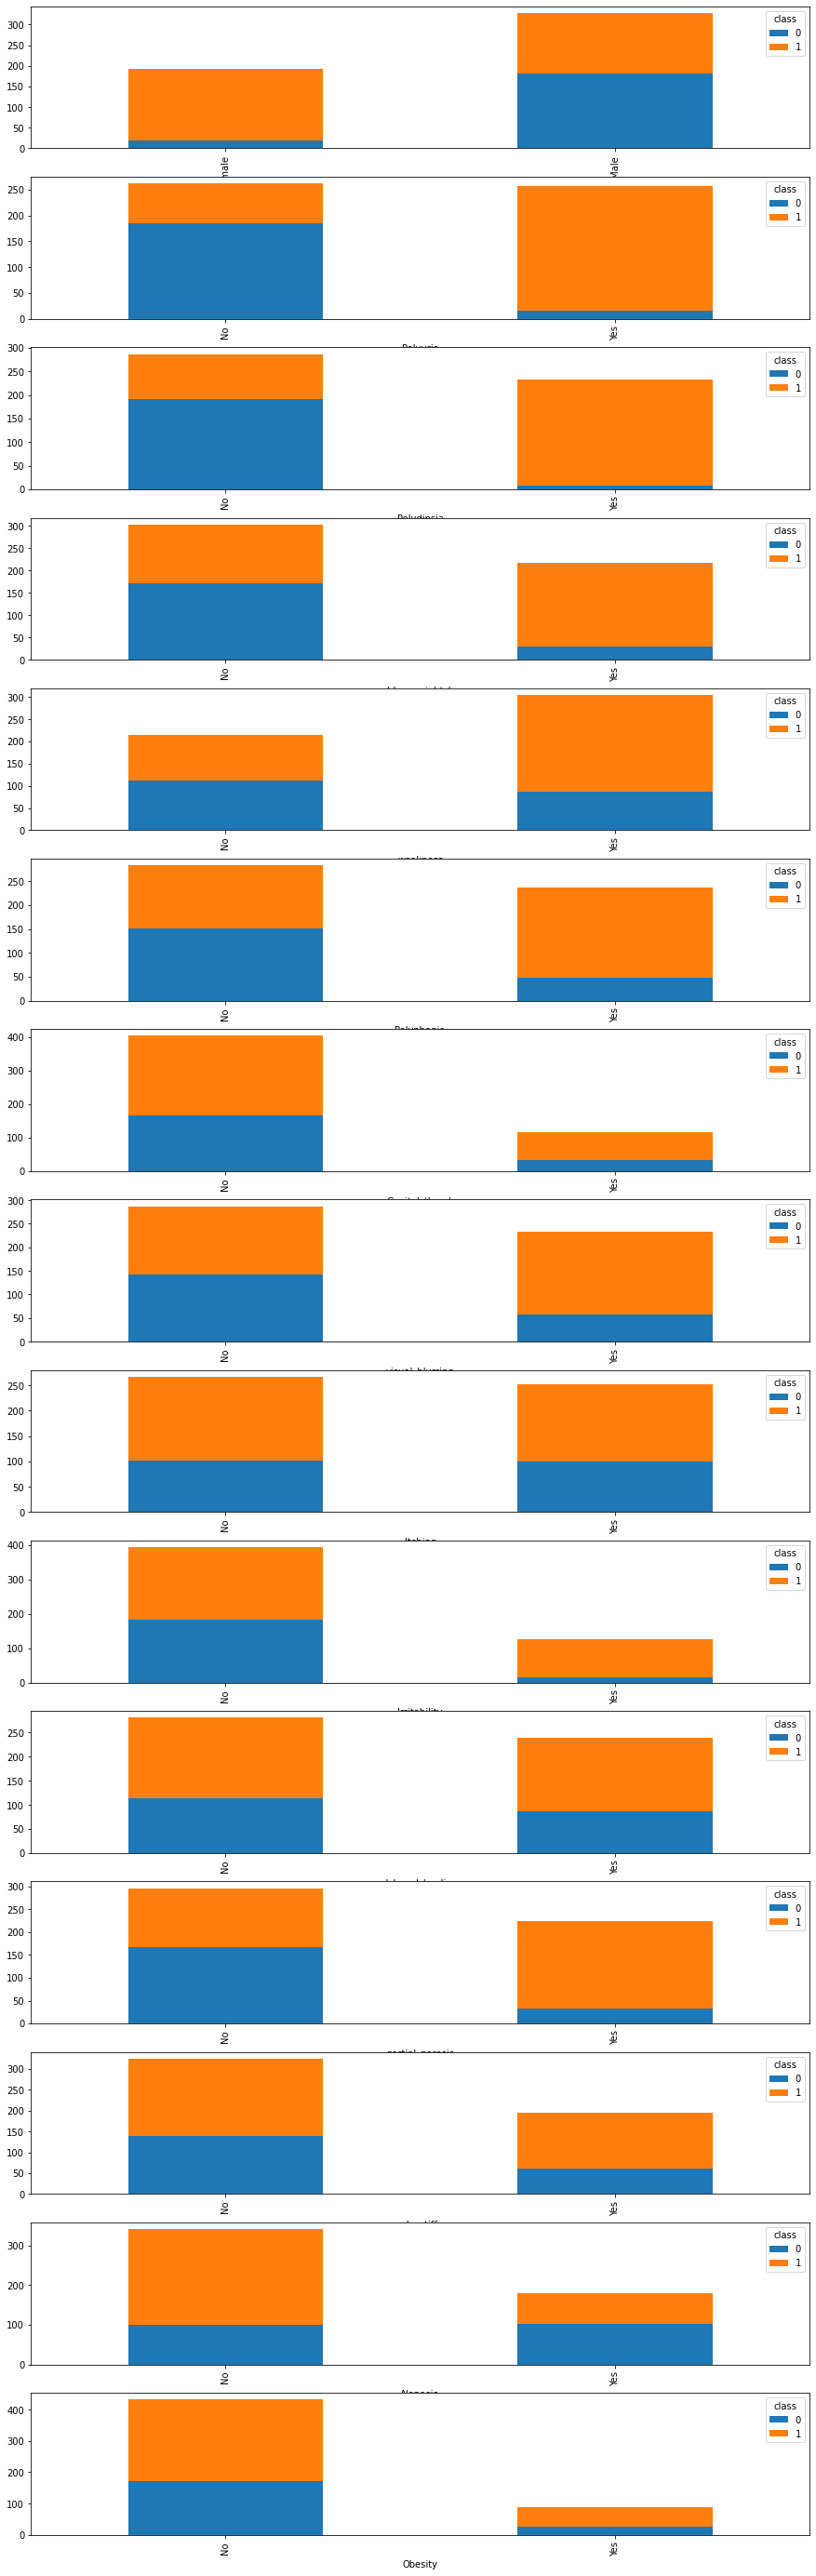

In [45]:
#Analysis of each category of the categorical variables of obj_cols dataframe Target variable - class.

obj_cols_viz = obj_cols
fig, axes = plt.subplots(len(obj_cols_viz), sharex = False, sharey = False, figsize = (15, 50))

for i in range(0, len(obj_cols_viz)):
    pd.crosstab(diabetes_symp[obj_cols_viz[i]], diabetes_symp[Target]).plot(kind = 'bar', stacked = True, grid = False, ax = axes[i])


## Following are the insights gathered from the above data
* Females are more prone to have Diabetes as compared to males.
* Persons having Polyuria are more prone to have Diabetes as compared to those not having Polyuria.(49.62%)
* Persons having Polydipsia are more prone to have Diabetes as compared to those not having Polydipsia.(44.81%)
* Persons experiencing sudden weight loss are more prone to have Diabetes as compared to those not experiencing any kind of sudden weight loss.(41.73%)
* Persons having weakness are more prone to have Diabetes as compared to those not having any weakness.(58.65%)
* Persons having Polyphagia are more prone to have Diabetes as compared to those not having Polyphagia.(45.58%)
* Persons experiencing Genital thrush are more prone to have Diabetes as compared to those not experiencing any kind of Genital thrush.(22.31%)
* Persons experiencing visual blurring are more prone to have Diabetes as compared to those not experiencing any kind of visual blurring.(44.81%)
* Persons experiencing any kind of Irritability are more prone to have Diabetes as compared to those not experiencing any kind of Irritability.(24.23%)
* Persons having partial paresis are more prone to have Diabetes as compared to those not having partial paresis.(43.08%)
* Persons experiencing any kind of muscle stiffness are more prone to have Diabetes as compared to those not experiencing any kind of muscle stiffness.(37.50%)
* Persons having Obesity are more prone to have Diabetes as compared to those not having Obesity.(16.92%)
### So, overall we can say that a person who is a Female and has either Polyuria, Polydipsia or Polyphagia, and is also experiencing weakness, Genital thrush, visual blurring, Irritability, partial paresis or muscle stiffness and also experiences either a sudden weight loss or is an Obese person is more prone to have Diabetes.

# Part C
* This dataset shows health conditions and contributing causes mentioned in conjunction with deaths involving coronavirus disease 2019 (COVID-19) by age group and jurisdiction of occurrence.

In [46]:
covid_dm = pd.read_excel('covid19_deaths_dm.xlsx')
covid_dm.head(3)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,2022-12-04,2020-01-01,2022-12-03,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,1456.0,1522.0,NaN
1,2022-12-04,2020-01-01,2022-12-03,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,5668.0,5882.0,NaN
2,2022-12-04,2020-01-01,2022-12-03,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,14796.0,15406.0,NaN


In [47]:
#creating a age group to know the which age is mostly afftected

covid_new = covid_dm.groupby(["Age Group"]).size()
df3 =pd.DataFrame(covid_new)
df3.columns = ["count"]
df3

,count
Age Group,
0-24,49680
25-34,49680
35-44,49680
45-54,49680
55-64,49680
65-74,49680
75-84,49680
85+,49680
All Ages,49680


#### almost every age group is affected by COVID 19 

In [48]:
#finding of how many deaths are due DM risk and other conditions

covid_dia_deaths = covid_dm.groupby(["Condition Group"]).size()
df4 =pd.DataFrame(covid_dia_deaths)
df4.columns = ["count"]

In [49]:
#creating new data with the condition and its %

df4["pct"] = (df4["count"]/df4["count"].sum())*100
df4

,count,pct
Condition Group,,
All other conditions and causes (residual),21600,4.347826
Alzheimer disease,21600,4.347826
COVID-19,21600,4.347826
Circulatory diseases,151200,30.434783
Diabetes,21600,4.347826
"Intentional and unintentional injury, poisoning, and other adverse events",21600,4.347826
Malignant neoplasms,21600,4.347826
Obesity,21600,4.347826
Renal failure,21600,4.347826


### High number of people are dies because of heart related complications and followed by respiratory diseases and Diabetes and other complications

In [50]:
#visualization of different comorbidies and its related covid 19 deaths 

num_dia = pd.DataFrame(covid_dm["COVID-19 Deaths"].groupby(covid_dm["Condition Group"]).mean())
l1 = list(num_dia.index.values)
l2 = list(num_dia["COVID-19 Deaths"])

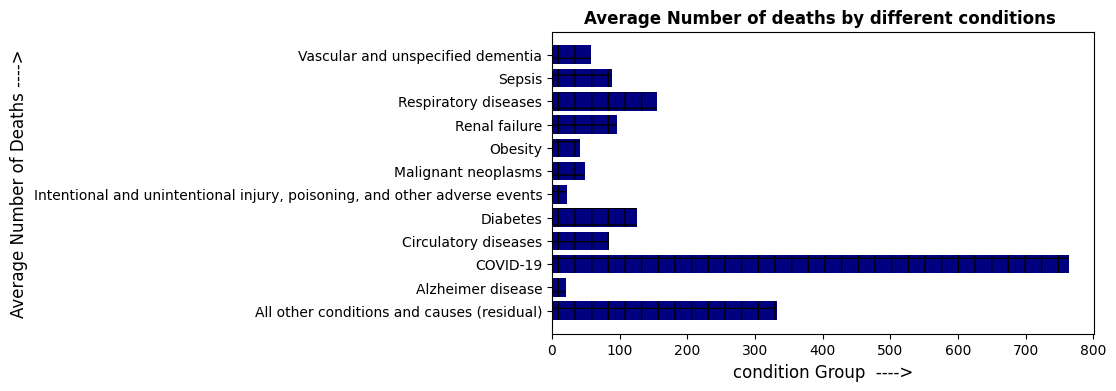

In [51]:
plt.figure(figsize = (7,4), dpi = 100)

bars = plt.barh(l1,l2, color = "navy", hatch = "+")
plt.ylabel("Average Number of Deaths ---->", fontdict = { "fontsize": 12})
plt.xlabel("condition Group  ---->", fontdict = {"fontsize": 12})

plt.title("Average Number of deaths by different conditions ", fontdict = {"fontweight": "bold"})

plt.show()

### From the above data we can observe that more number of deaths due to respiratory system related comorbidies followed by the Diabetes, so that we can assume that diabetes is a risk factor for covid 19 death. People with DM should take many precautions to be health and maintain hygiene for not afftected by COVID19.

In [52]:
#description of overall data of covid 19 death with comorbidies

covid_dm.describe(include = np.object).transpose()

,count,unique,top,freq
Group,496800,3,By Month,447120
State,496800,54,Kansas,9200
Condition Group,496800,12,Circulatory diseases,151200
Condition,496800,23,Influenza and pneumonia,21600
ICD10_codes,496800,23,E10-E14,21600
Age Group,496800,10,0-24,49680
Flag,142113,1,One or more data cells have counts between 1-9...,142113


### Data Merging of 2 data sets

In [53]:
#comparing age groups in 2 different data sets

combine_ac = pd.concat([diabetes, covid_dm], axis =1)
combine_ac



,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,2278392.0,8222157.0,Caucasian,Female,[0-10),NaN,6.0,25.0,1.0,1.0,...,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,1456.0,1522.0,NaN
1,149190.0,55629189.0,Caucasian,Female,[10-20),NaN,1.0,1.0,7.0,3.0,...,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,5668.0,5882.0,NaN
2,64410.0,86047875.0,AfricanAmerican,Female,[20-30),NaN,1.0,1.0,7.0,2.0,...,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,14796.0,15406.0,NaN
3,500364.0,82442376.0,Caucasian,Male,[30-40),NaN,1.0,1.0,7.0,2.0,...,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,36819.0,38256.0,NaN
4,16680.0,42519267.0,Caucasian,Male,[40-50),NaN,1.0,1.0,7.0,1.0,...,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,80808.0,83730.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2022.0,8.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,222.0,222.0,NaN
496796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2022.0,9.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,168.0,168.0,NaN
496797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2022.0,10.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,117.0,117.0,NaN
496798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2022.0,11.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,89.0,89.0,NaN


In [54]:
## Data Aggregation: knowing facts about covid 19 deaths in this data using aggregate 

combine_ac.aggregate({"COVID-19 Deaths": ['sum', 'min','max']})

,COVID-19 Deaths
sum,49156000.0
min,0.0
max,1074728.0


## overall more than 49 million people are dies because of covid 19 with associated risk factors

In [55]:
## Data merging: merging of 2 data sets using concat 

combine_ab = pd.concat([diabetes_sym, diabetes ], axis =1)
combine_ab


,Age,Gender,Polyuria,Polydipsia,sudden_weight_loss,weakness,Polyphagia,Genital_thrush,visual_blurring,Itching,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,40.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,No,No,No,No,No,No,No,No,No,NO
1,58.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,41.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,No,No,No,No,No,No,No,No,Yes,NO
3,45.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,60.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [56]:
## Data Aggregation: finding min and max age group in this data 

combine_ab.aggregate({"Age": ['min','max']})

,Age
min,16.0
max,90.0


## The min age in this data is 16 and the max is 90 years

In [57]:
##Data Transformation: knowing the data of number of mentions in records comparing with covid 19 deaths

combine_ac.groupby('COVID-19 Deaths')['Number of Mentions'].transform('sum')

0          3012.0
1         11550.0
2         15406.0
3         38256.0
4         83730.0
           ...   
496795    16609.0
496796    23414.0
496797    23187.0
496798    28584.0
496799        0.0
Name: Number of Mentions, Length: 496800, dtype: float64

### from the above transformation we can observe that number covid 19 deaths overall records mentioned in it

In [58]:
#the overall symptomatic and diabetes data was combined and mentioned 
combine_ab.describe()

,Age,Gender,Polyuria,Polydipsia,sudden_weight_loss,weakness,Polyphagia,Genital_thrush,visual_blurring,Itching,...,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,...,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,48.028846,0.630769,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,...,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,12.151466,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,...,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,47.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


## The mean age of every data set is 48.02 it indicates the patients above the age of 45 are more prone to get DM and they must take precautions, regular excercise and diet maintainace.

# Overall Summary
### Problem applicability



* Males are more likely to get diabetes than females. 

* Based on the aforementioned statistics, people in the 50+ age range have a higher likelihood of obtaining diabetes than those in other racial and ethnic groups.

* The average number of diagnoses rises dramatically before the age of 60, but then stabilizes at 7-8 procedures. * 77% of patients take their prescribed medications, compared to 23% who don't.

* Medication adherence is especially crucial in DM since patient compliance raises the risk of DM-related complications. Persons with polyuria and polydipsia are more likely to have diabetes than those who do not. Diabetes is a risk factor for COVID-19 death.

* A risk factor for COVID 19 mortality is diabetes. 

* People with diabetes mellitus (DM) should practice good hygiene, take preventative measures, and avoid contracting COVID-19. 

* The average age of all data sets is 48.02, which shows that people over 45 are more likely to develop diabetes and should take measures by exercising frequently and maintaining a healthy diet.


* The ongoing COVID-19 pandemic has further underscored the importance of type 2 diabetes prevention and diabetes management. Adults with some underlying medical conditions, heart conditions, chronic lung diseases, and diabetes, are more likely than others to become severely ill if infected with COVID-19. As a result, they are more likely to need hospitalization, be admitted into an intensive care unit, need a ventilator to help them breathe, or die.

* Early surveillance data reported to CDC from January to May 2020 indicated that COVID-19 hospitalizations were 6 times higher and deaths 12 times higher for people with COVID-19 and an underlying medical condition such as diabetes. Other factors, such as increased age, a larger number of underlying medical conditions, and lower socioeconomic position, can further increase a person’s risk of severe illness.


### References:

1. Beata Strack, Jonathan P. DeShazo, Chris Gennings, Juan L. Olmo, Sebastian Ventura, Krzysztof J. Cios, and John N. Clore, “Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records,” BioMed Research International, vol. 2014, Article ID 781670, 11 pages, 2014.

2. COVID-19 Was Leading Cause of Death for People With Diabetes at End of 2020 BY QUINN PHILLIPS | JUNE 14, 2022

Useful links:

* HealthData.gov :

Documentation: https://healthdata.gov/dataset/Conditions-Contributing-to-COVID-19-Deaths-by-Stat/uvkj-kpue

Data: https://data.cdc.gov/api/views/hk9y-quqm/rows.csv?accessType=DOWNLOAD


* UCI Data set:

Documentation: https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008

Data: https://archive.ics.uci.edu/ml/machine-learning-databases/00296/dataset_diabetes.zip


* Kaggle web site data:

Data: https://www.kaggle.com/datasets/alakaaay/diabetes-uci-dataset

    